# Case Study 2 : Data Science in Yelp Data

**Required Readings:** 
* [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge) 
* Please download the Yelp dataset from the above webpage.
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

Here is an example of the data format. More details are included [here](https://www.yelp.com/dataset_challenge)

## Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
## Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

Yelp as a review website, allows users to review and rate various business objects and significantly influences consumers' behaviors. We plan to use the reviews on Yelp to predict users' star ratings for business objects. In a world of technology, where we currently face an information overloading problem, it is important that we mine valueable information such as user preferences from reviews, to provide more accurate recommendations. In this notebook, we only focus on predicting the rating based on the review text, and other user-related attributes given to us.

We will consider this as a regression problem, and compare the results for various methods. We build 3 (Ordinary Least Squares, Lasso, Polynomial Regression) different prediction models using 9 predictors and analyze the performance of each model to find the best model for predicting.
























# Data Collection/Processing: 

We load the following datasets for specific tasks:
* Business Data - Contains information related to each business listed on Yelp such as location, name, rating, additional attributes (Parking availability, Takeout), and hours of operation. We use this for data exploration tasks 1 and 2, and for our main problem.


* Checkin Data - Contains information related to checkins made by users at different times, and related frequencies. We need this for data exploration task 1.


* Review Data - Contains full text reviews by different users for specific businesses, and review related ratings. We need this for our main problem, to extract text related sentiment metrics.


* User Data - Contains user related data, such as friend mapping, and user-related ratings. The user-related ratings can have a major impact on discerning a that user's ratings for different restaurants. These user-related metrics indicate how funny, useful or cool this user's ratings are overall.

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import json
from collections import Counter
import operator
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd

# load busdata
def loadbus():
    busdata = []
    file = open('business.json', 'r') #{}{}{}...
    for line in file.readlines():
        busdata.append(json.loads(line))
    return busdata

# load checkin data
def loadcheckin():
    checkindata = []
    file = open('checkin.json', 'r')
    for line in file.readlines():
        checkindata.append(json.loads(line))
    return checkindata
#print checkindata[0]#len(checkindata)

# load review data
def loadreview():
    reviewdata = []
    file = open('review.json', 'r')
    for line in file.readlines():
        reviewdata.append(json.loads(line))
    return reviewdata

# load user data
def loaduser():
    userdata = []
    file = open('user.json', 'r')
    for line in file.readlines():
        userdata.append(json.loads(line))
    return userdata

busdata = loadbus()
checkindata = loadcheckin()
reviewdata = loadreview()
userdata = loaduser()

We need to merge all these different, related data, into one dataframe to allow processing on the data. We make use of 'Pandas' to do the same, where we use inner joins based on the User-IDs and Business-IDs. 

Note:  Running the following un-commented code-blocks takes a lot of time due to the sheer size of the data. Hence, we just consider businesses in Illinois. If you want to experiment further, we have attached a .csv file for all the merged data 'IL_new.csv'

In [ ]:
# merge useful data into a dataframe: ################################################################
# columns: busid, text, funny, useful, cool, stars, userid, fans, user_useful, user_cool, user_funny
# output as dfComplete.csv file

# def mergedata():

#     # busid, cool, funny, review_id, stars, text, useful, user_id
#     dfreview = json_normalize(reviewdata).drop(['date', 'review_id'] ,1)
#     # user_id, fans, user_funny, user_useful, user_cool
#     dfuser = json_normalize(userdata)[['user_id', 'fans', 'cool', 'funny', 'useful']]
#     dfuser = dfuser.rename(columns={'cool':'user_cool', 'funny': 'user_funny', 'useful': 'user_useful'})
    
#     # merge dfreview and dfuser on user_id
#     dfmerge = pd.merge(dfreview, dfuser, on='user_id', how='inner')
    
#     # write data to csv
#     dfmerge.to_csv('dfComplete.csv', encoding='utf-8') # complete data

# mergedata()

# extract state=IL specific data ~36000 records ################################################
# convert busdata to dataframe
# df = json_normalize(busdata)
# # load dfComplete.csc file
# types_dict = {'funny': 'int64',
#               'Unnamed: 0': 'O',
#               'user_cool': 'float64',
#               'user_id': 'O',
#               'text': 'O',
#               'business_id': 'O',
#               'user_funny': 'float64',
#               'user_useful': 'float64',
#               'fans': 'float64',
#               'stars': 'int64',
#               'useful': 'float64',
#               'cool': 'O'}
# data = pd.read_csv('dfComplete.csv', dtype=types_dict, low_memory=True)
# # extract business_id data and combine with state data
# busid = pd.DataFrame(data=data['business_id'])
# idstate = pd.merge(busid, df[['business_id', 'state']], on='business_id', how='inner')
# # extract IL-specific data from the dfComplete file
# ILid = idstate[idstate['state'] == 'IL']['business_id'].tolist()
# ILdf = data[data['business_id'].isin(ILid)].drop(['business_id', 'user_id'], axis=1)
# #ILdf.to_csv('IL.csv', encoding='utf-8', index=False)

Every row of the dataframe now consists of the following - Business ID, User ID, Business-related metrics (our response variable being the number of stars this business has), User-related metrics (how funny, cool, and useful the user's reviews are overall), review by that user for that specific restaurant, stars given by that user supporting the review, for the restaurant. 

The text to us in its raw form is not of much use for machine learning algorithms. So we make use of TextBlob to find sentiment scores for each of the reviews, specifically - Sentiment Polarity (How positive or negative the review is?) and Subjectivity (How much is it based on the user's personal feelings?)

Note: The following code block also takes a lot of time to run. If you want to experiment with the data or test the following code block, consider looking at the .csv file 'IL_new.csv', which has been provided along with this notebook

In [ ]:
# sentiment analysis on reviews ###############################################################

# import numpy as np
# import pandas as pd
# from textblob import TextBlob


# def sentiment_score(filename = 'IL.csv'):
#
#     # load the csv file containing the combined dataframe
#     raw_data = pd.read_csv(filename, low_memory = True)
#
#     raw_text = []
#     text_pol = []
#     text_sub = []
#
#     for i in range(len(raw_data['text'])):
#         raw_text.append(raw_data['text'][i])
#
#     # to handle the error when the scripts' cods is not in utf-8 format
#     for k in range(len(raw_text)):
#         raw_text[k] = raw_text[k].decode('utf-8','ignore')
#
#     # compute polarity and subjectivity scores
#     for j in range(len(raw_data['text'])):
#         text_pol.append(TextBlob(raw_text[j]).sentiment.polarity)
#         text_sub.append(TextBlob(raw_text[j]).sentiment.subjectivity)
#
#     # add the two scores to the dataframe and export as csv
#     #dataframe = pd.DataFrame({'polarity':text_pol,'subjectivity':text_sub})
#     raw_data = raw_data.drop(['text','Unnamed: 0','Unnamed: 0.1'], axis = 1)
#     raw_data['polarity'] = pd.Series(data = text_pol)
#     raw_data['subjectivity'] = pd.Series(data = text_sub)
#     raw_data.to_csv("IL_new.csv", index = False, sep = ',')
#
# sentiment_score()

# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [3]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

def catCounter():
    cat = [d['categories'] for d in busdata]
    cat = reduce(operator.add, cat)
    counted = Counter(cat).most_common()[0:10]
    for x,y in counted:
        print y, x
        
catCounter()


54618 Restaurants
27971 Shopping
24777 Food
17014 Beauty & Spas
16205 Home Services
14230 Health & Medical
12154 Nightlife
11232 Local Services
11052 Automotive
10563 Bars


** (2) Find the most popular business objects** 
* print the top 10 most popular business objects in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [12]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from pandas.io.json import json_normalize

def checkinCounter():
    
    collection = []
    
    # count weekly checkin for each business object
    for bo in checkindata:
        count = 0
        for day in bo['time']:
            for hour in checkindata[0]['time'][day]:
                count += checkindata[0]['time'][day][hour]
        collection.append((count, bo['business_id']))
        
    # sort a list of tuples by count and extract ids
    bolist = [y for (x,y) in sorted(collection, key=lambda x: x[0], reverse=True)[0:10]]
    
    # find bo.json for each bo
    boinfo = [b for b in busdata if b['business_id'] in bolist]
            
    # make a dataframe to show info
    df = json_normalize(boinfo)[['name', 'city', 'state']]
    df['category'] = [b['categories'][0] for b in boinfo]
    df['checkin'] = [x for (x,y) in sorted(collection, key=lambda x: x[0], reverse=True)[0:10]]
    
    print df.set_index('checkin')
    
checkinCounter()

                                        name         city state     category
checkin                                                                     
129                  Avon Lake Animal Clinic    Avon Lake    OH         Pets
129               Athena's Deli & Restaurant    Avon Lake    OH  Restaurants
129                             Pizza Cutter    Avon Lake    OH  Restaurants
129                              Dairy Queen    Avon Lake    OH      Burgers
129                     Sweetbriar Golf Club    Avon Lake    OH         Golf
129                               Fratello's    Avon Lake    OH         Bars
129                               Geppetto's    Avon Lake    OH  Restaurants
129                              Giant Eagle    Avon Lake    OH   Drugstores
129                                 QuikTrip    Charlotte    NC   Automotive
129      Applebee's Neighborhood Grill & Bar  Rocky River    OH      Burgers


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

As mentioned earlier, we will now use the merged data that we obtained from the above steps, by importing the data in 'IL_new.csv'. We will first consider the following regression-based models to predict the rating:

* Ordinary Least Squares
* Lasso
* Polynomial Regression


Write codes to implement the solution in python:

In [1]:
import pandas as pd
illinois_data = pd.read_csv("IL_new.csv")
len(illinois_data)

36467

We will now see the number of ratings we have for each class/number of stars to check if there is any imbalance.

In [5]:
from collections import Counter
Ratings_Counts = Counter(illinois_data['stars'])


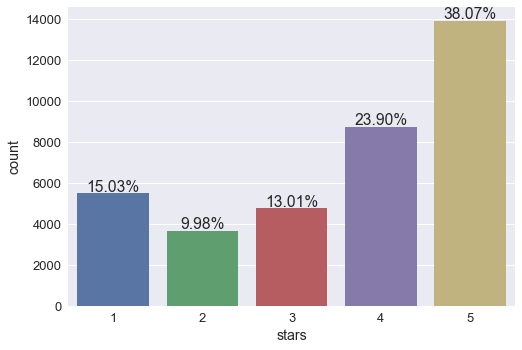

In [23]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
total = float(len(illinois_data))
sns.set(font_scale = 1.3)
ax = sns.countplot(x="stars",data=illinois_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format(height*100/total),
            ha="center")
plt.show()

As you can see, there is a severe class imbalance. We can sample this data further to make sure that each class/rating is represented by an equal number of data instances. We sample 3500 reviews for each rating (1,2,3,4,5) as can be seen below.

In [25]:
#Balanced by Class (3500 instances for each rating)

df = illinois_data.query('stars == 5').sample(3500)
df = df.append([illinois_data.query('stars == 4').sample(3500),illinois_data.query('stars == 3').sample(3500),illinois_data.query('stars == 2').sample(3500),illinois_data.query('stars == 1').sample(3500)])
df = df.sample(frac=1).reset_index(drop=True)

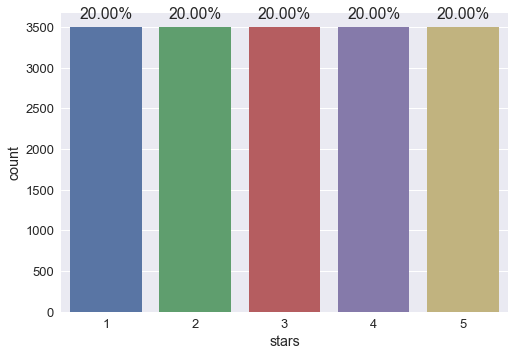

In [26]:
total = float(len(df))
sns.set(font_scale = 1.3)
ax = sns.countplot(x="stars",data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format(height*100/total),
            ha="center")
plt.show()

We next check for any missing data or unusually large data, which could cause problems when running machine learning algorithms

In [28]:
#Any missing data?
df.isnull().values.any()

False

In [29]:
#Any infinities?
import numpy as np
np.isinf(df.values).any()

False

As can be seen in the above two steps, there is no missing data. All the missing data was already imputed in the data collection and preprocessing stage. Now our data, correctly sampled, is ready to be used for machine learning algorithms. Following are the columns that we are going to be using.

In [30]:
# Features of the sampled dataset
df.columns.values

array(['cool', 'funny', 'stars', 'useful', 'fans', 'user_cool',
       'user_funny', 'user_useful', 'polarity', 'subjectivity'], dtype=object)

We make use of the 'Scikit-Learn' package of python to perform lasso and ordinary least squares. Our data is first split into the input and the response variables. Each of these sets are further divided for training and testing - 75% for training and 25% for testing

In [31]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
import random

#Splitting the data into input and the response data
np.random.seed(100)
data_x = pd.DataFrame(df, columns = ['cool', 'funny', 'useful', 'fans', 'user_cool', 
                                       'user_funny', 'user_useful', 'polarity', 'subjectivity'])
data_y = pd.DataFrame(df, columns = ['stars'])

In [32]:
#splitting input data into training and testing
random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25)
print "Training data shape for input and response data",X_train.shape, y_train.shape
print "Testing data shape for input and response data",X_test.shape, y_test.shape


Training data shape for input and response data (13125, 9) (13125, 1)
Testing data shape for input and response data (4375, 9) (4375, 1)


Lasso is a technique which reduces the number of features we will be using for computing a linear model, by penalizing large coefficients, and making zero the coefficients of predictors which are not very useful. The penalty term $$\alpha$$ has to be fine-tuned to find the best lasso model, which reduces our error the most. We make use of k-cross validation, k = 10, to find this penalty term.

C:\Users\Mihin Sumaria\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\Mihin Sumaria\Anaconda3\envs\py27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\Mihin Sumaria\Anaconda3\envs\py27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Mihin Sumaria\Anaconda3\envs\py27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

(0.0, array([  1.78904419e-01,  -4.27631649e-02,  -2.08460866e-02,
         1.43329912e-03,   7.53465739e-05,  -1.20608789e-04,
        -3.53647511e-05,   3.66139079e+00,   6.63051239e-01]))
(0.1111111111111111, array([  1.42251284e-02,  -1.47585352e-02,  -1.42078840e-02,
         2.68444648e-03,   5.53281833e-05,  -6.86809235e-05,
        -1.53121015e-05,   1.54771952e+00,   0.00000000e+00]))
(0.22222222222222221, array([  0.00000000e+00,  -0.00000000e+00,  -1.58857125e-02,
         2.42813030e-03,   7.54432392e-05,  -1.00299458e-04,
        -1.69044680e-06,   0.00000000e+00,   0.00000000e+00]))
(0.33333333333333331, array([  0.00000000e+00,  -0.00000000e+00,  -1.38613412e-02,
         1.96313218e-03,   7.69796407e-05,  -9.53456594e-05,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00]))
(0.44444444444444442, array([  0.00000000e+00,  -0.00000000e+00,  -1.18366184e-02,
         1.49992634e-03,   8.00951146e-05,  -9.00049786e-05,
        -0.00000000e+00,   0.00000000e+00,   

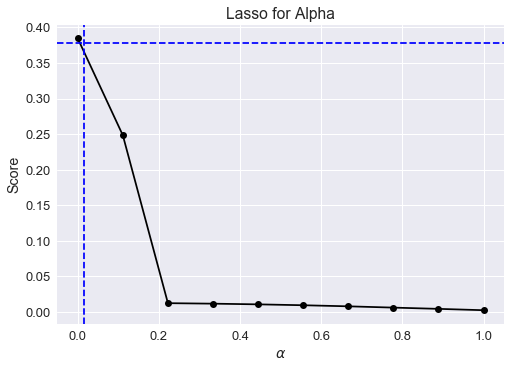

In [33]:
#Lasso cross validation
alphas = np.linspace(0,1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_train, y_train)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(X_train, y_train)
lassocv_score = lassocv.score(X_train, y_train)
lassocv_alpha = lassocv.alpha_
print('Best alpha', lassocv.alpha_)
print('Best coefficient', lassocv.coef_)
print ('Non-zero coeficients number is ', sum(lassocv.coef_ != 0))


plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.title('Lasso for Alpha')
plt.show()


prediction_lasso = np.array([item*lassocv.coef_[0] for item in X_test.cool]) + np.array([item*lassocv.coef_[1] for item in X_test.funny]) +np.array([item*lassocv.coef_[2] for item in X_test.useful]) + np.array([item*lassocv.coef_[3] for item in X_test.fans]) + np.array([item*lassocv.coef_[4] for item in X_test.user_cool]) + np.array([item*lassocv.coef_[5] for item in X_test.user_funny]) +np.array([item*lassocv.coef_[6] for item in X_test.user_useful]) + np.array([item*lassocv.coef_[7] for item in X_test.polarity]) +np.array([item*lassocv.coef_[8] for item in X_test.subjectivity])


As shown above, we make use of the coefficients associated to the best alpha, i.e. the alpha which gives us the smallest cross-validation error, to predict the ratings.

In [37]:
from sklearn import metrics
np.around(prediction_lasso,decimals=0)
prediction_lasso[prediction_lasso>5] = 5
prediction_lasso[prediction_lasso<1] = 1
metrics.mean_squared_error(y_test, prediction_lasso)

5.28035644421636

We compute Root Mean Squared Error (RMSE) based on rounded off predictions to find the accuracy of our model. Turns out, that Lasso gives us a very high error metric of 5.28, which is not good at all for predicting reviews.

We now perform ordinary least squares, and check the P-value of each variable to decide which variable to use, and which not to.

In [38]:
# linear regression
data_ols_x = pd.DataFrame(df, columns = ['cool', 'funny', 'useful', 'fans', 'user_cool','user_funny', 'user_useful', 'polarity', 'subjectivity'])
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(data_ols_x, data_y, test_size=0.25)


# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     9486.
Date:                Wed, 21 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:28:49   Log-Likelihood:                -21130.
No. Observations:               13125   AIC:                         4.228e+04
Df Residuals:                   13116   BIC:                         4.235e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cool             0.1821      0.014     13.220      0.000       0.155       0.209
funny           -0.0314      0.005     -6.107      0.000      -0.042      -0.021
useful          -0.0160      0.002     -9.282      0.000      -0.019      -0.013
fans             0.0030      0.001      4.458      0.000       0.002       0.004
user_cool     2.618e-05   5.45e-05      0.480      0.631   -8.07e-05       0.000
user_funny      -0.0001   5.96e-05     -1.773      0.076      -0.000    1.12e-05
user_useful  -1.282e-05    3.5e-05     -0.366      0.714   -8.15e-05    5.58e-05
polarity         3.6810      0.048     76.116      0.000       3.586       3.776
subjectivity     4.1755      0.025    167.351      0.000       4.127       4.224
==============================================================================
Omnibus:                      111.809   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.058
Skew:                           0.161   Prob(JB):                     7.76e-30
Kurtosis:                       3.377   Cond. No.                     5.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As can be seen above, the p-values for user related metrics are all beyond the p-value threshold of 0.05. We will consider dropping these for the next model.

In [39]:
np.around(predictions,decimals=0)
predictions[predictions>5] = 5
predictions[predictions<1] = 1
metrics.mean_squared_error(y_test, predictions)

1.3710136876656491

Now that we have dropped the user-related variables, we perform OLS again, and check the increase in Adjusted-R-Squared value to see if our model is doing better than before.

In [40]:
# linear regression
data_ols_x = pd.DataFrame(df, columns = ['cool', 'funny', 'useful', 'fans','polarity', 'subjectivity'])
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(data_ols_x, data_y, test_size=0.25)


# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.422e+04
Date:                Wed, 21 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:32:00   Log-Likelihood:                -21136.
No. Observations:               13125   AIC:                         4.228e+04
Df Residuals:                   13119   BIC:                         4.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cool             0.1745      0.014     12.878      0.000       0.148       0.201
funny           -0.0315      0.005     -6.125      0.000      -0.042      -0.021
useful          -0.0156      0.002     -9.047      0.000      -0.019      -0.012
fans             0.0020      0.001      3.434      0.001       0.001       0.003
polarity         3.6826      0.048     76.144      0.000       3.588       3.777
subjectivity     4.1796      0.025    168.498      0.000       4.131       4.228
==============================================================================
Omnibus:                      111.509   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.079
Skew:                           0.159   Prob(JB):                     7.68e-30
Kurtosis:                       3.379   Cond. No.                         95.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There has been no significant increase in the R-Squared value, which means that the user-related metrics would have lead to overfitting.

In [41]:
np.around(predictions,decimals=0)
predictions[predictions>5] = 5
predictions[predictions<1] = 1
metrics.mean_squared_error(y_test, predictions)

1.3722157328468485

We get comparable RMSE to when we used all the predictors. As compared to lasso, OLS did significantly better. Also our most important variables seem to be the following:

* Polarity
* Subjectivity
* Review coolness

These are positively correlated to the ratings, which means that higher these values, higher the rating.

The following variables are negatively correlated to the ratings:
* Review funniness
* Review usefulness

The higher these values, the lower the ratings are.

We can interpret this in various ways

We now perform polynomial regression to see if there is an underlying non-linear relationship that can be exploited.

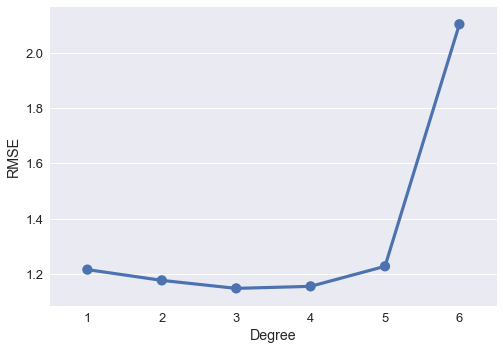

In [57]:
# Polynomial Regression
def PolynomialRegression(degree):
    np.random.seed(10)
    data_x = pd.DataFrame(df, columns = ['cool', 'funny', 'useful', 'fans', 'polarity','subjectivity'])

    X_poly = PolynomialFeatures(degree = degree).fit_transform(data_x)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, data_y, test_size=0.25)

    # create a Linear Regressor   
    lin_regressor = linear_model.LinearRegression().fit(X_train, y_train)
    y_preds = lin_regressor.predict(X_test)

    # get the predictions

    np.around(y_preds,decimals=0)
    y_preds[y_preds>5] = 5
    y_preds[y_preds<1] = 1

    return metrics.mean_squared_error(y_test, y_preds)

degrees = np.arange(1,7)
RMSEs = [PolynomialRegression(degree) for degree in degrees]

ax = sns.pointplot(x=degrees,y=RMSEs)
ax.set(xlabel='Degree',ylabel='RMSE')
plt.show()

Initially, the RMSE decreases with increasing degree. This may be due to the fact that a more non-linear function may be good for mapping the underlying relationship of the factors. But as the degree increases, the model begins to overfit the given data, causing high RMSE. We get the best RMSE for degree = 3, which is about 1.14. 

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


+------------------------+---------------+
|      Method Used       | RMSE obtained |
+------------------------+---------------+
|         Lasso          | 5.28035644422 |
| Ordinary Least Squares | 1.37221573285 |
| Polynomial Regression  | 1.14738827266 |
+------------------------+---------------+


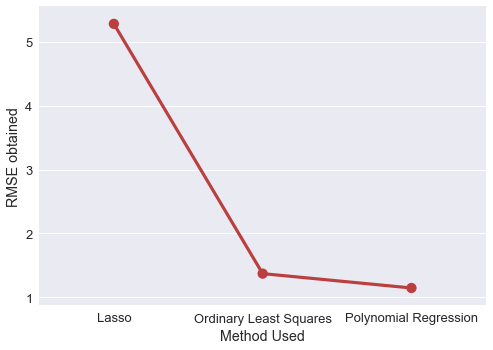

In [63]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#!pip install prettytable
from prettytable import PrettyTable
comparison = PrettyTable()
x = ['Lasso','Ordinary Least Squares','Polynomial Regression']
y = [5.28035644421636,1.3722157328468485,PolynomialRegression(3)]
comparison.add_column("Method Used",x)
comparison.add_column("RMSE obtained",y)
print comparison
ax = sns.pointplot(x=x,y=y,color = '#bb3f3f')
ax.set(xlabel = "Method Used",ylabel = "RMSE obtained")
plt.show()

From the above results and summaries, we can deduce that the following features come in handy in predicting the rating of a restaurant:

* Polarity: Positively correlated, which means that the more positive the review, the higher the ratings could be.
* Subjectivity: Positive reviews tend to be subjective in nature, and can mean higher ratings as well.
* Coolness of the review: If a review is rated as cool, then it could be highlighting some of the cool aspects of the business, which can mean positive correlation the ratings.
* Funniness of the review: If a review is rated as funny by peers, then it can hint towards sarcasm, or can be negative for the business overall.
* Usefulness of the review: A review can be useful if it tells other users both pros and cons of a given business place, and can hint towards lower ratings as per the given observations

We have been able to successfully predict ratings with a relatively low margin of error, which can be improved when we take into consideration more factors and larger samples. Also this problem can be considered a classification problem rather than a regression problem, which can give us different results.

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 2".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) Finding the most popular business categories (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular business objects (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


